# Cardiovascular Disease Detection (Capstone Project 2)

## 1. Data Wrangling

### 1.1 Importing Libraries

In [1]:
# I begin by importing several libraries that are essential in a data science life cycle.
import pandas as pd # for, inter alia, data wrangling and transformation
import numpy as np # for, inter alia, greater mathematical supportability
import matplotlib.pyplot as plt # for, inter alia, data visualization
import seaborn as sns # for, inter alia, data visualization
from scipy import stats # for, inter alia, statistical procedures

In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\16466\\Cardiovascular_disease_case_study')
os.getcwd()

'C:\\Users\\16466\\Cardiovascular_disease_case_study'

### 1.2 Sourcing and Loading Data

In [3]:
# The acronym "cvd" stands for cardiovascular disease.
# Note additional argument "sep" to indicate the proper delimiter of the dataset.
cvd = pd.read_csv('cardio_train.csv', sep=';')

# View first few rows of dataset.
cvd.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


### 1.3 Checking Data Types and Potential Missing Values

In [4]:
# Using the info() method allows me to see both the number of columns and rows in the dataset
# as well as the data type value contained in each column.
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
# Using the isna().sum() method to check if there are any missing values in the dataset.
# Note that this step is done for verification.
cvd.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Note how it is not reasonable to check for duplicate values in this data set, given all columns store *only* numerical values.
As to missing values, there aren't any in this data set.
So, I will be moving on to describing the data set to see if any interesting, and concerning, patterns arise.

### 1.4 Describing Data

In [6]:
# Using the describe() method to get descriptive statistics on the data set.
# As can be seen, some of the summaries do not make much sense --for instance, some variables
# are essentially categorical but have been rendered numerically, so finding the mean or standard deviation of them is not helpful. 
# Ignoring these variables (for now), a more pressing matter arises: that of rendering certain variables (e.g., age, height, and weight)
# in a more preferable way for both convenience and clarity. 
cvd.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### 1.4.1 Modifying Age, Height, and Weight Columns

In [7]:
# The age column captures the age of a person in days. Having age rendered this way is unappealing
# and hard to work with, so I will be converting age to years.
cvd['age'] = cvd.age.apply(lambda x: x / 365).round()

In [8]:
# The height column captures the height of a person in centimeters.
# As a matter of preference, I'll be converting centimeters to inches.
cvd['height'] = cvd.height.apply(lambda x: x / 2.54).round()

In [9]:
# The weight column captures the weight of a person in kilograms.
# As a matter of preference, I'll be converting kilograms to pounds (lbs).
cvd['weight'] = cvd.weight.apply(lambda x: x * 2.205).round()

In [10]:
# Changing column names accordingly
cvd = cvd.rename(
    columns={'age'   :'age (yr)',
             'height':'height (in)',
             'weight':'weight (lb)'})

In [11]:
# Verifying changes
cvd.head(5)

,id,age (yr),gender,height (in),weight (lb),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,62.0,1,61.0,152.0,130,80,2,2,0,0,1,0
1,989,40.0,1,64.0,157.0,110,70,1,1,0,0,1,1
2,990,60.0,1,65.0,154.0,120,80,1,1,0,0,1,0
3,991,40.0,2,65.0,187.0,120,80,1,1,1,1,1,0
4,992,64.0,1,61.0,137.0,120,80,1,1,0,0,1,0


### 1.5 Checking Unique Values

In [12]:
# By using the nunique() method, I can get the unique values of each column in the data set.
# The number of unique values for some of these columns is what is expected, as some columns
# store binary or ternary values.
cvd.nunique()

id             69301
age (yr)          28
gender             2
height (in)       53
weight (lb)      202
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

### 1.6 Cleaning Data and Dealing with Outliers

In [13]:
# Seeing a descriptive summary of the data set once again is helpful. There still remains many questionable values
# in the data set that have to be dealt with. For instance, the minimum and maximum recorded heights in the data set are 21.7 inches
# and 98.4 inches, respectively. These heights are strickingly abnormal!
# In this subsection, I'll be working with such outliers, seeing if substituting or removing them, all together, is my best choice.
cvd.describe()

,id,age (yr),gender,height (in),weight (lb),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,53.338177,1.349519,64.742919,163.570324,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.765427,0.476821,3.276885,31.711943,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,30.000000,1.000000,22.000000,22.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.000000,1.000000,63.000000,143.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,54.000000,1.000000,65.000000,159.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.000000,2.000000,67.000000,181.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,98.000000,441.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### 1.6.1 Dealing with Outliers

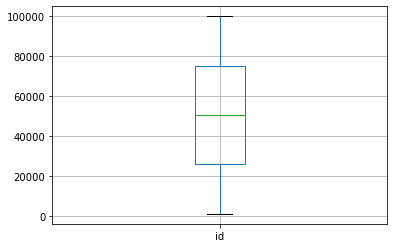

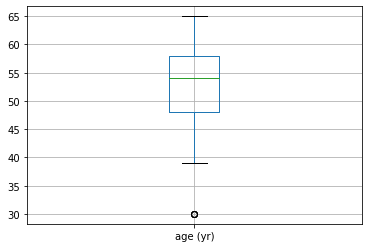

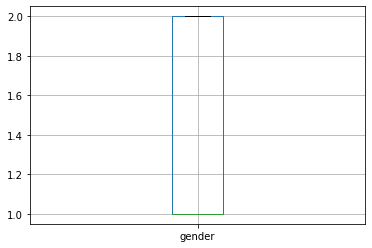

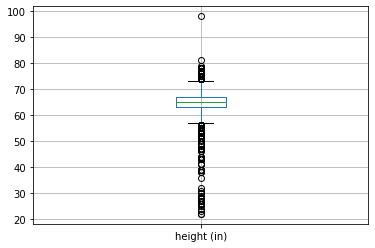

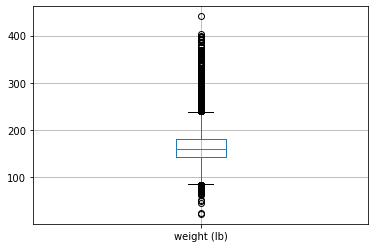

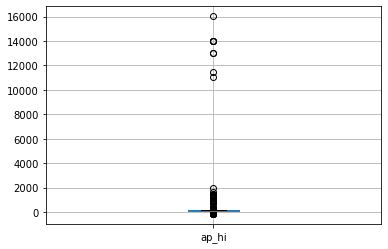

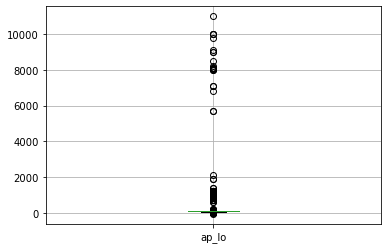

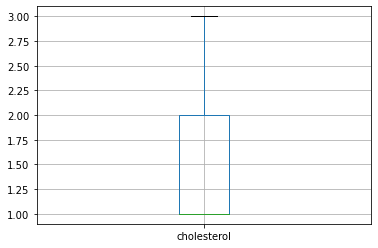

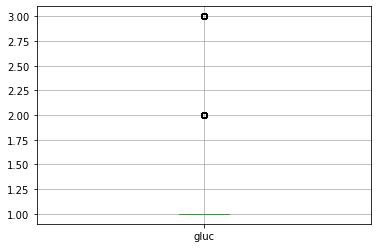

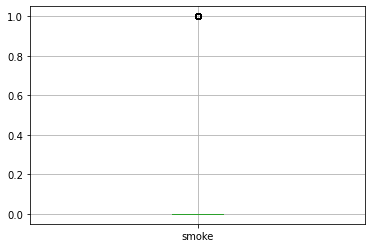

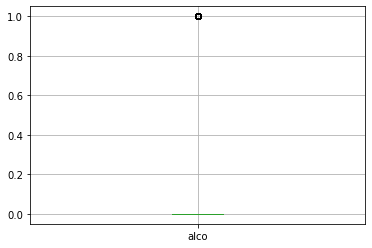

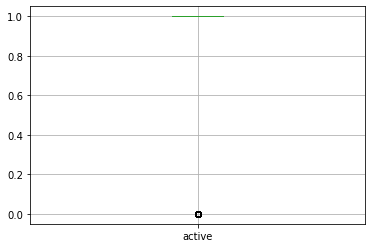

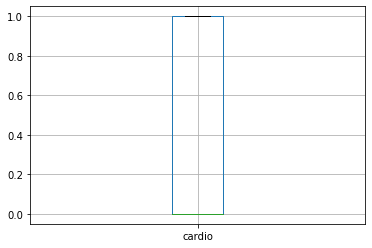

In [14]:
# Using box plots, I will check for outliers in each column of the data set.
for column in cvd:
    plt.figure()
    cvd.boxplot([column])

As can be seen, the variables height, weight, ap_hi, and ap_lo have many outliers, respectively. 

I'm going to check the unique values for each of these variables to get a better idea of how to deal
with the outliers. 

### 1.6.2 Cleaning ap_hi Variable

In [15]:
# Using the unique() method to get unique values in the column.
# There are impossibly low (e.g., negative values) and high values in column.
# Note, the highest blood pressure ever recorded on a human was 370/360.
# Any systolic blood pressure that exceeds 370 is highly likely due to mistaken encoding.
cvd['ap_hi'].unique()

array([  130,   110,   120,   100,   140,   160,   170,   150,   147,
         115,    90,   180,    14,   125,   135,   190,   137,   153,
          11,   145,   148,   126,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   133,   116,   169,    10,   121,    16,
          80,   112,   159,   122,   113,   118,   200,   155,   142,
         131,   157,   136,   146,   138,  -100,   909,    70,   109,
          85,   106,   129,    93,     7,    95,   179,   161,   156,
         168,   132,   104,   103,   178,   175,   123,   128,   151,
          15,   139, 11500,   127,    17,   108,   144,   158,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [16]:
# Using the abs() method to get rid of negative systolic values.
cvd['ap_hi'] = cvd['ap_hi'].abs()

# Verifying
cvd['ap_hi'].unique()

array([  130,   110,   120,   100,   140,   160,   170,   150,   147,
         115,    90,   180,    14,   125,   135,   190,   137,   153,
          11,   145,   148,   126,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   133,   116,   169,    10,   121,    16,
          80,   112,   159,   122,   113,   118,   200,   155,   142,
         131,   157,   136,   146,   138,   909,    70,   109,    85,
         106,   129,    93,     7,    95,   179,   161,   156,   168,
         132,   104,   103,   178,   175,   123,   128,   151,    15,
         139, 11500,   127,    17,   108,   144,   158,   102,     1,
        1420,    13,   143,   701,   107,   184,   149,   167,   114,
         101,    60,  1500,   181,   171,   202,   111,   907,    20,
         188,   185,   163,   173,   154,   177,   174, 14020,  1400,
         240,   191,   197,  1620,   152,    96,   199,  1130,   193,
          99,   196,

In [17]:
# Checking how many systolic readings exceed 370. 
sum(cvd['ap_hi'] > 370)

39

In [18]:
# Checking how many systolic readings are lower than 50.
sum(cvd['ap_hi']  < 50)

180

There are many outliers that have to dealt with; however, it is not clear
on how to deal with them.

In [19]:
# I will drop ap_hi values that are greater than or equal to 370.
cvd.drop(cvd[cvd['ap_hi'] >= 370].index, inplace=True)

# I will also drop ap_hi values that less than or equal to 50. 
# Values less than or equal to 50 are likely due to error.
cvd.drop(cvd[cvd['ap_hi'] <= 50].index, inplace=True)

In [20]:
# Verifying 
cvd['ap_hi'].unique()

array([130, 110, 120, 100, 140, 160, 170, 150, 147, 115,  90, 180, 125,
       135, 190, 137, 153, 145, 148, 126, 105, 220, 119, 141, 165, 164,
       124, 172, 162, 117, 134, 166, 210, 176, 133, 116, 169, 121,  80,
       112, 159, 122, 113, 118, 200, 155, 142, 131, 157, 136, 146, 138,
        70, 109,  85, 106, 129,  93,  95, 179, 161, 156, 168, 132, 104,
       103, 178, 175, 123, 128, 151, 139, 127, 108, 144, 158, 102, 143,
       107, 184, 149, 167, 114, 101,  60, 181, 171, 202, 111, 188, 185,
       163, 173, 154, 177, 174, 240, 191, 197, 152,  96, 199, 193,  99,
       196, 309, 230, 207, 215,  97, 195, 187], dtype=int64)

In [21]:
# These summary statistics seem much more reasonable.
cvd['ap_hi'].describe()

count    69082.000000
mean       126.996150
std         17.108362
min         60.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        309.000000
Name: ap_hi, dtype: float64

### 1.6.3 Cleaning ap_lo Variable

In [22]:
# Proceeding similarly as before, I will check the unique values
# inside this column.
# Note how there are impossibly low and high values. Working with the
# fact stated before, I will state the cutoff points to be both 360 and
# 40. The former because the highest diastolic recorded was 360, so any value
# exceeding this number is highly likely due to mistaken encoding; the latter because
# a reading of lower than 40 is considered dangerously low.
cvd['ap_lo'].unique()

array([   80,    70,    90,   100,  1000,    60,    79,    78,   110,
          84,    75,  1100,    85,    86,    87,  1001,    82,    95,
          69,    74,    97,    65,   120,    81,    73,    89,  1200,
          83,   119,    50,    93,   105, 10000,   150,    99,    77,
          59,  8044,   140,    92,  1044,   108,   125,   115,    68,
          61,   106,   102,    91,    94,    66,    52,   170,    76,
         160,    62,    30,    96,   130,   113,    67,  9100,  1033,
          10,    88,   902,     8,   112,   104,    71,    72,  1008,
          98,    20,   802,  8000,  1022,   850,    40,   708,    57,
         101,  9011,  1011,    64,     0,  1007,  1177,  7100,   109,
          45,   709,    63,  8500,   800,    58,  1110,  8099,  1088,
         126,  1077,  1120,     7,   103,  1125,   180,   121,  8100,
         710,  5700,  8079,  1111,  1003,     6,  1900,   809,   114,
         801,  1002,    53,   111,     1,   118,    56,   182,   810,
           9,  7099,

In [23]:
# Using abs() method to get rid of negative values.
cvd['ap_lo'] = cvd['ap_lo'].abs()

# Verifying
cvd['ap_lo'].unique()

array([   80,    70,    90,   100,  1000,    60,    79,    78,   110,
          84,    75,  1100,    85,    86,    87,  1001,    82,    95,
          69,    74,    97,    65,   120,    81,    73,    89,  1200,
          83,   119,    50,    93,   105, 10000,   150,    99,    77,
          59,  8044,   140,    92,  1044,   108,   125,   115,    68,
          61,   106,   102,    91,    94,    66,    52,   170,    76,
         160,    62,    30,    96,   130,   113,    67,  9100,  1033,
          10,    88,   902,     8,   112,   104,    71,    72,  1008,
          98,    20,   802,  8000,  1022,   850,    40,   708,    57,
         101,  9011,  1011,    64,     0,  1007,  1177,  7100,   109,
          45,   709,    63,  8500,   800,    58,  1110,  8099,  1088,
         126,  1077,  1120,     7,   103,  1125,   180,   121,  8100,
         710,  5700,  8079,  1111,  1003,     6,  1900,   809,   114,
         801,  1002,    53,   111,     1,   118,    56,   182,   810,
           9,  7099,

In [24]:
# Checking how many diastolic readings exceed 360.
sum(cvd['ap_lo'] > 360)

940

In [25]:
# Checking how many diastolic readings are lower than 40.
sum(cvd['ap_lo'] < 40)

47

There are several outliers (i.e., values that either exceed or are lower than self-defined cutoff points).

In [26]:
# I will drop ap_lo values that are strictly less than 60
# and greater than or equal to 360.
cvd.drop(cvd[cvd['ap_lo'] >= 360].index, inplace=True)
cvd.drop(cvd[cvd['ap_lo'] < 40].index, inplace=True)

In [27]:
# Verifying
cvd['ap_lo'].unique()

array([ 80,  70,  90, 100,  60,  79,  78, 110,  84,  75,  85,  86,  87,
        82,  95,  69,  74,  97,  65, 120,  81,  73,  89,  83, 119,  50,
        93, 105, 150,  99,  77,  59, 140,  92, 108, 125, 115,  68,  61,
       106, 102,  91,  94,  66,  52, 170,  76, 160,  62,  96, 130, 113,
        67,  88, 112, 104,  71,  72,  98,  40,  57, 101,  64, 109,  45,
        63,  58, 126, 103, 180, 121, 114,  53, 111, 118,  56, 182, 107,
        55, 190, 122, 135,  54,  49], dtype=int64)

In [28]:
# These summary statictics seem much more reasonable.
cvd['ap_lo'].describe()

count    68095.000000
mean        81.380013
std          9.673868
min         40.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        190.000000
Name: ap_lo, dtype: float64

### 1.6.4 Cleaning Weight Variable

In [29]:
# Getting summary statistics on weight variable.
# Results do not seem overtly suspicious since dealing with
# weight values isn't as clear cut as dealing with blood pressure values.
# Some of these weights, even if seemingly suspicious, cannot
# be solely determined to derived due to encoding error. This issue
# warrants a different approach from the last one (i.e., the one used for
# ap_hi and ap_lo variables).
cvd['weight (lb)'].describe()

count    68095.000000
mean       163.384434
std         31.567891
min         24.000000
25%        143.000000
50%        159.000000
75%        181.000000
max        441.000000
Name: weight (lb), dtype: float64

In [30]:
# Getting quartiles and interquartile range.
Q1  = 143.325
Q3  = 180.810
IQR = Q3 - Q1

# Getting outliers.
weight_lower_boundary = round(Q1 - (1.5 * IQR))
weight_upper_boundary = round(Q3 + (1.5 * IQR))

In [31]:
print('The lower outlier weight treshold is {} lbs.'.format(weight_lower_boundary))

The lower outlier weight treshold is 87 lbs.


In [32]:
print('The upper outlier weight treshold is {} lbs.'.format(weight_upper_boundary))

The upper outlier weight treshold is 237 lbs.


In [33]:
# A natural question to ask is "how many outliers does the weight variable contain?"
print('Number of upper outliers is:', sum(cvd['weight (lb)'] > weight_upper_boundary))
print('Number of lower outliers is:', sum(cvd['weight (lb)'] < weight_lower_boundary))

Number of upper outliers is: 1682
Number of lower outliers is: 49


These outlier thresholds can serve as cutoff points; however, once again, there
isn't a clear-cut method to dealing with such outliers. For example, a weight of 87 pounds
can be easily explained if the person happens to be a child, a sickly person, etc. Similar reasoning can 
explain a weight of 237 pounds, which, on closer inspection, doesn't seem unreasonable. 

In [34]:
# Inspecting observations that fall under lower boundary. 
cvd.loc[cvd['weight (lb)'] < weight_lower_boundary]

,id,age (yr),gender,height (in),weight (lb),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
3053,5306,42.0,1,47.0,66.0,110,70,1,1,0,0,1,0
5095,8226,48.0,1,59.0,82.0,120,80,1,1,0,0,1,0
9748,14908,60.0,1,64.0,84.0,100,70,1,1,0,0,1,0
9928,15182,59.0,1,60.0,82.0,150,80,3,3,0,0,1,1
11177,16963,48.0,1,62.0,86.0,90,70,1,1,0,0,1,0
14023,21040,62.0,1,56.0,75.0,100,70,1,1,0,0,1,0
15623,23318,60.0,1,65.0,77.0,100,70,1,1,0,0,1,0
16207,24167,47.0,2,67.0,68.0,150,90,2,2,0,0,1,1
17860,26503,50.0,1,63.0,66.0,120,80,1,1,0,0,1,1
18883,27965,58.0,1,60.0,84.0,110,80,1,1,0,0,1,0


In [35]:
# Inspecting observations that fall above upper boundary. 
cvd.loc[cvd['weight (lb)'] > weight_upper_boundary]

,id,age (yr),gender,height (in),weight (lb),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
39,1038,52.0,2,67.0,249.0,130,80,1,1,0,0,1,0
41,1040,52.0,1,70.0,284.0,140,90,3,3,0,0,0,1
52,1051,54.0,2,72.0,251.0,120,80,1,1,0,0,0,0
87,1098,52.0,1,60.0,273.0,120,80,2,2,0,0,1,1
95,1109,56.0,1,69.0,265.0,150,90,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69174,99799,54.0,2,74.0,238.0,130,80,2,2,0,1,0,1
69247,99925,58.0,1,65.0,254.0,130,80,1,1,0,0,1,1
69248,99930,64.0,2,68.0,249.0,110,80,1,1,0,0,0,1
69282,99972,48.0,2,72.0,243.0,130,90,2,2,0,0,1,1


<Figure size 1080x360 with 0 Axes>

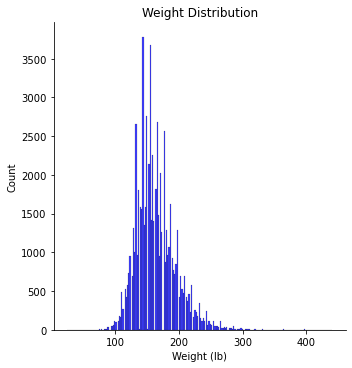

In [36]:
# I will check the distribution of the weight column to see if any ideas come up.
plt.figure(figsize=(15,5))
sns.displot(cvd['weight (lb)'], color='blue')
plt.title('Weight Distribution')
plt.ylabel('Count')
plt.xlabel('Weight (lb)');

I will not remove outliers due to the reasons stated above. 
Moving on to the height variable. 

### 1.6.5 Cleaning Height Variable

In [37]:
# Getting summary statistics of height variable.
# There are some suspicious values (e.g., the minimum height is about 21 inches and the
# maximum height is about 98 inches).
# Note the shortest recorded height is about 21.5 inches.
cvd['height (in)'].describe()

count    68095.000000
mean        64.743975
std          3.267264
min         22.000000
25%         63.000000
50%         65.000000
75%         67.000000
max         98.000000
Name: height (in), dtype: float64

In [38]:
# Getting quartiles and interquartile range.
Q_1   = 62.598425
Q_3   = 66.929134
IQR_2 = Q_3 - Q_1

# Getting outliers.
height_lower_boundary = round(Q_1 - (1.5 * IQR_2))
height_upper_boundary = round(Q3 + (1.5 * IQR_2))

In [39]:
print('The lower outlier height treshold is {} inches.'.format(height_lower_boundary))

The lower outlier height treshold is 56 inches.


In [40]:
print('The upper outlier height treshold is {} inches.'.format(height_upper_boundary))

The upper outlier height treshold is 187 inches.


In [41]:
# A natural question to ask is "how many outliers does the height variable contain?"
print('Number of upper outliers is:', sum(cvd['height (in)'] > height_upper_boundary))
print('Number of lower outliers is:', sum(cvd['height (in)'] < height_lower_boundary))

Number of upper outliers is: 0
Number of lower outliers is: 195


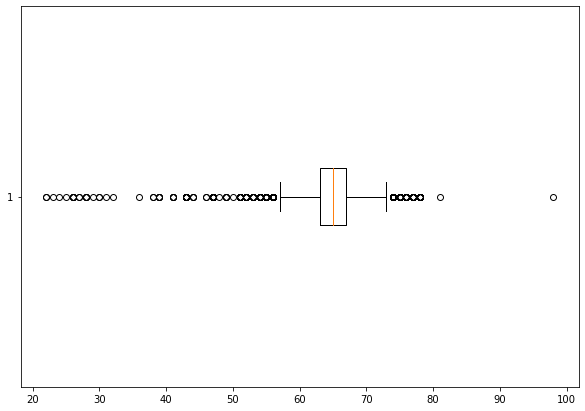

In [42]:
# Checking the total amount of values that have a z-score of less than 3.
sum(np.abs(stats.zscore(cvd['height (in)'])) < 3)

# Viewing height column before cleaning.
fig = plt.figure(figsize=(10, 7))
plt.boxplot(cvd['height (in)'], vert=0)
plt.show()

The majority of values in the height column have a z-score of less than 3. Getting rid of values that are greater than or equal to 3 might be helpful in the analysis.

In [43]:
# Subsetting dataset
cvd = cvd[(np.abs(stats.zscore(cvd['height (in)'])) < 3)]

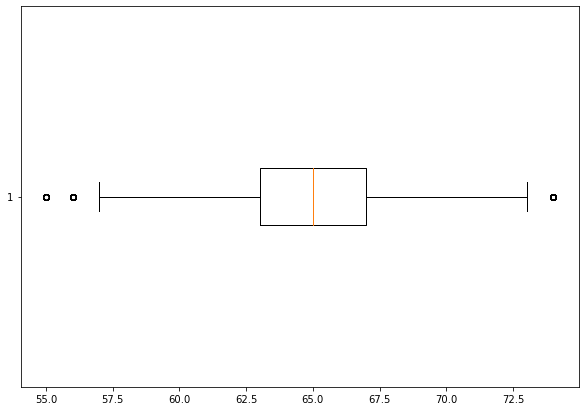

In [44]:
# Viewing height column after cleaning.
fig = plt.figure(figsize =(10, 7))
plt.boxplot(cvd['height (in)'], vert=0)
plt.show()

The height column now has considerably fewer outliers than before.

### 1.6.6 Exploring Data after Cleaning

In [45]:
# Checking "shape" of dataset
# There are less rows, as expected.
cvd.shape

(67851, 13)

In [46]:
# Getting, once again, summary statistics on dataset.
# Overall, the dataset is looking much more cleaned.
cvd.describe()

,id,age (yr),gender,height (in),weight (lb),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67851.000000,67851.000000,67851.000000,67851.000000,67851.000000,67851.00000,67851.000000,67851.000000,67851.000000,67851.000000,67851.000000,67851.000000,67851.000000
mean,50476.693122,53.328013,1.348086,64.766827,163.312110,126.60739,81.381910,1.364991,1.226069,0.087825,0.053662,0.803820,0.494820
std,28552.361053,6.767293,0.476367,3.091625,31.397667,16.76021,9.671466,0.679221,0.572024,0.283042,0.225351,0.397109,0.499977
min,988.000000,30.000000,1.000000,55.000000,24.000000,60.00000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25749.500000,48.000000,1.000000,63.000000,143.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50520.000000,54.000000,1.000000,65.000000,159.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75111.500000,58.000000,2.000000,67.000000,181.000000,140.00000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,74.000000,441.000000,240.00000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# 2 EDA

## 2.1 Visualizing Dependent Variable

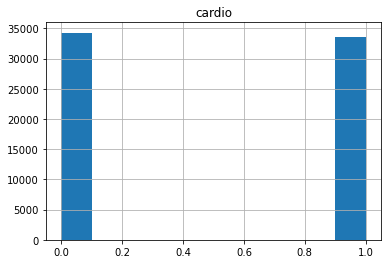

In [47]:
# Given the dependent variable of this project will be the cardio variable, 
# it's reasonable to analyze this variable further. 
# I'll be using both the value_counts() method and a histogram to get
# a clearer picture of this variable.
cvd.hist(column='cardio'); # The semicolon renders the results more cleanly.

It seems that the dataset is pretty evenly split with half of population having no cardiovascular disease and the other half with cardiovascular disease.

In [48]:
# Although the histogram offers a very helpful, visual representation of the variable,
# supporting it with numbers further enriches the intuition. 
# Here I use the value_counts() method.
cvd['cardio'].value_counts()

0    34277
1    33574
Name: cardio, dtype: int64

As mentioned, the dataset is pretty evenly split. It is verified.

## 2.2 Exploring Relationships among Variables

In [49]:
# Calling the corr() method provides me with the 
# coefficients of my choosing.
# Using this method I can, hopefully, get a better idea of what 
# variable(s) can be our independent variable(s).
cvd.corr(method='spearman') # I am deriving the Spearman coefficient as some of our variables are not continuous.

,id,age (yr),gender,height (in),weight (lb),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.002793,0.003256,-0.002079,-0.001671,0.004160,-0.000131,0.005794,0.002357,-0.002679,-0.000359,0.003486,0.004074
age (yr),0.002793,1.000000,-0.021233,-0.083218,0.064916,0.224281,0.158988,0.143310,0.092825,-0.047912,-0.028657,-0.010932,0.237084
gender,0.003256,-0.021233,1.000000,0.531037,0.171828,0.063032,0.065593,-0.037054,-0.020385,0.338176,0.171152,0.006262,0.007262
height (in),-0.002079,-0.083218,0.531037,1.000000,0.312594,0.020506,0.031534,-0.059872,-0.024056,0.196357,0.095604,-0.007827,-0.013133
weight (lb),-0.001671,0.064916,0.171828,0.312594,1.000000,0.277818,0.251845,0.136484,0.109664,0.071688,0.068206,-0.015149,0.180191
ap_hi,0.004160,0.224281,0.063032,0.020506,0.277818,1.000000,0.735143,0.206617,0.105815,0.027846,0.032698,-0.003397,0.449372
ap_lo,-0.000131,0.158988,0.065593,0.031534,0.251845,0.735143,1.000000,0.164972,0.082905,0.024959,0.037939,0.001972,0.355642
cholesterol,0.005794,0.143310,-0.037054,-0.059872,0.136484,0.206617,0.164972,1.000000,0.407361,0.014498,0.041415,0.006191,0.214886
gluc,0.002357,0.092825,-0.020385,-0.024056,0.109664,0.105815,0.082905,0.407361,1.000000,-0.000402,0.018203,-0.010426,0.091666
smoke,-0.002679,-0.047912,0.338176,0.196357,0.071688,0.027846,0.024959,0.014498,-0.000402,1.000000,0.339262,0.025443,-0.016104


As can be seen, it appears that both systolic and diastolic blood pressures are (positively) moderately correlated with the dependent variable. Similarily, but more weakly, we see that both the age and cholesterol variables are also correlated with the dependent variable. By using this method, I get an idea of the field of candidancy for independent variable(s). However, I'm afforded, yet, a more illustrative option.

### 2.2.1 Visualizing Correlations

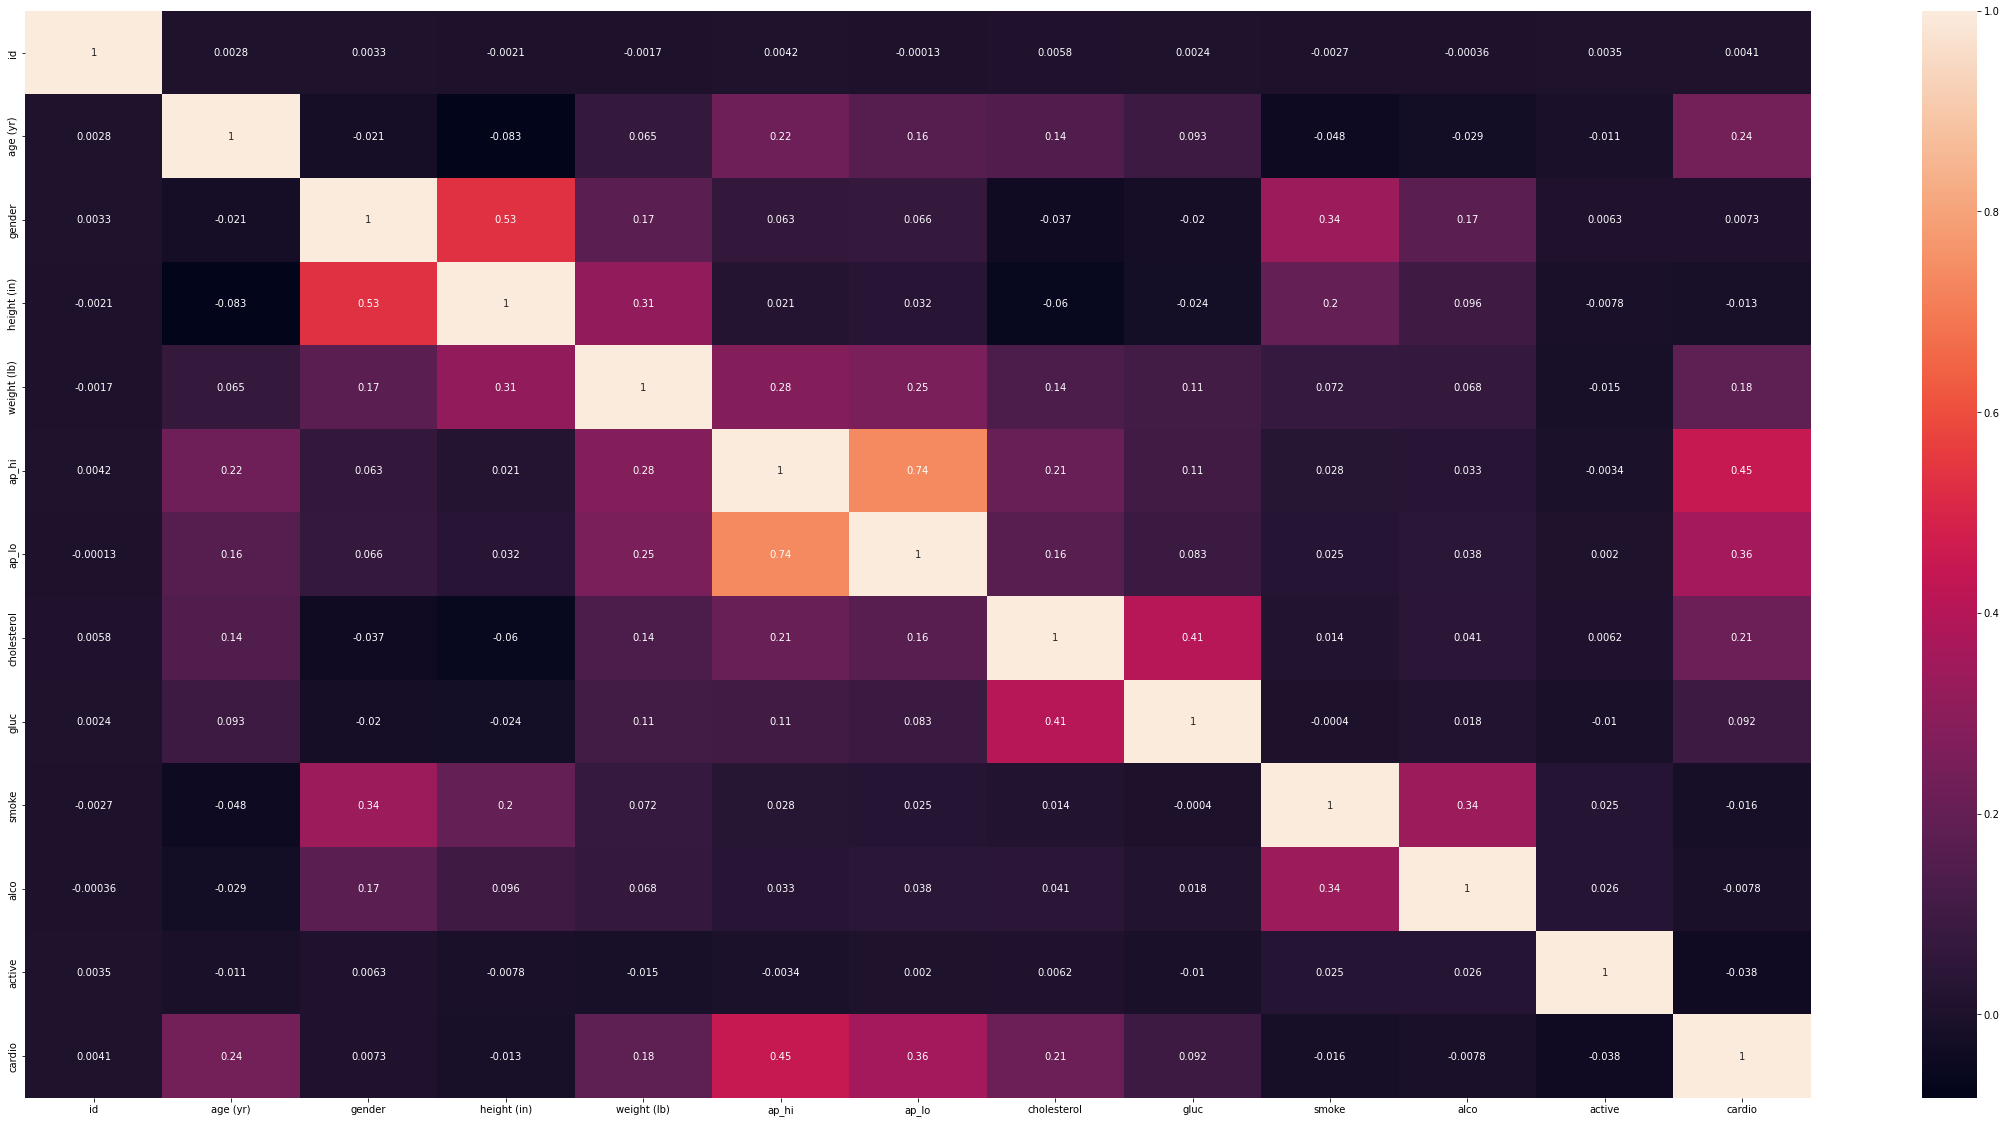

In [50]:
# Using corr() method is incredibly useful; however, 
# having a more visual representation can aid in seeing the relations between variables more clearly. 
# By using heatmap() method, relations are color-coded, with the darker shades being indicative negatve relations and lighter shades the inverse.
plt.figure(figsize=(40, 20)) # Ensuring size of figure is large enough
sns.heatmap(cvd.corr(method='spearman'), annot=True); # By providing the annot parameter the boolean value "True", an annotation is provided.

The significant correlations that hold for the dependent variable are as expected. The heatmap makes the procedure of relation identification much easier.

## 2.3 Visualizing Variables

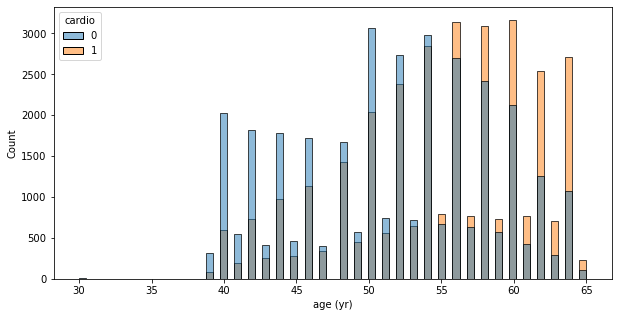

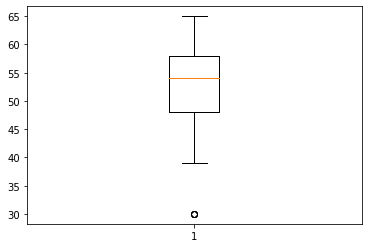

In [51]:
# Getting a histogram of the age variable in connection with
# cardiovascular disease lends to seeing at what age (if any)
# is cardiovascular more prevalent. 
plt.figure(figsize=(10,5)) # Ensuring size of plot is large enough to view.
sns.histplot(x='age (yr)', hue='cardio', data=cvd )
plt.show()

# Getting a boxplot to contrast with histogram
plt.boxplot(x='age (yr)', data=cvd)
plt.show()

It seems that people who are 55-years-old or over make up the bulk of people with cardiovascular disease. 

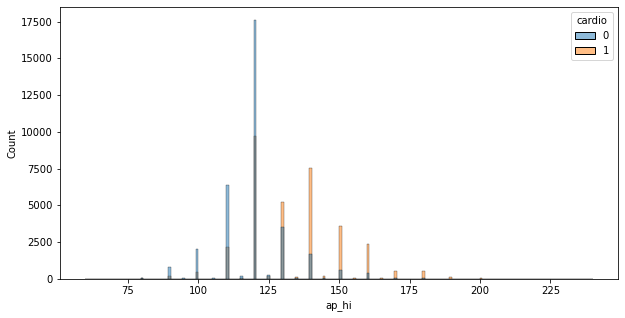

In [52]:
# Seeing the prevalence of cardiovascular disease by systolic blood pressure reading.
plt.figure(figsize=(10,5))
sns.histplot(x='ap_hi', hue='cardio', data=cvd)
plt.show()

Unsurprisingly, those who had a higher systolic reading were more likely to have cardiovascular disease than those with a lower systolic reading. The blood pressure mark in which cardiovascular disease seems much more pronounced is 140 and above.

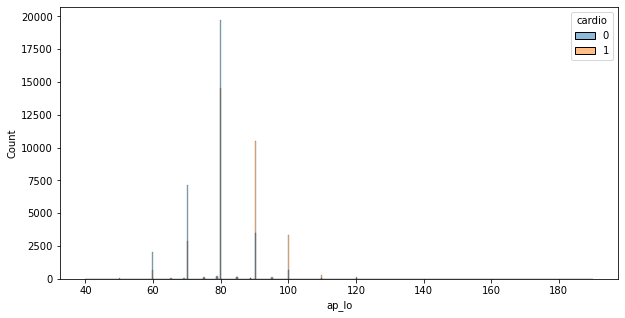

In [53]:
# Seeing the prevalence of cardiovascular disease by diastolic blood pressure reading.
plt.figure(figsize=(10, 5))
sns.histplot(x='ap_lo', hue='cardio', data=cvd)
plt.show()

Unsurprisingly, those who had a higher diastolic reading were more likely to have cardiovascular disease than those with a lower diastolic reading. The blood pressure mark in which cardiovascular disease seems much more pronounced is 90 and above. 

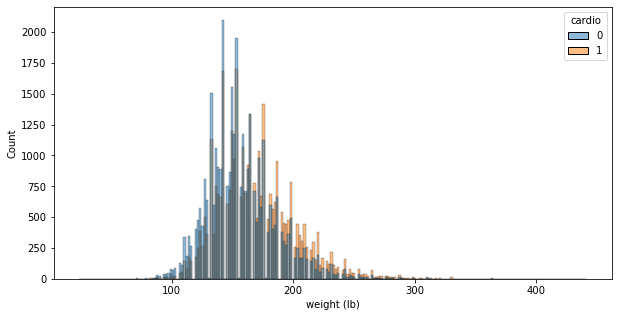

In [54]:
# Seeing the prevalence of cardiovascular disease by weight.
plt.figure(figsize=(10,5))
sns.histplot(x='weight (lb)', hue='cardio', data=cvd)
plt.show()

Unsurprisingly, those who had a higher weight were more likely to have cardiovascular disease than those with a lower weight.

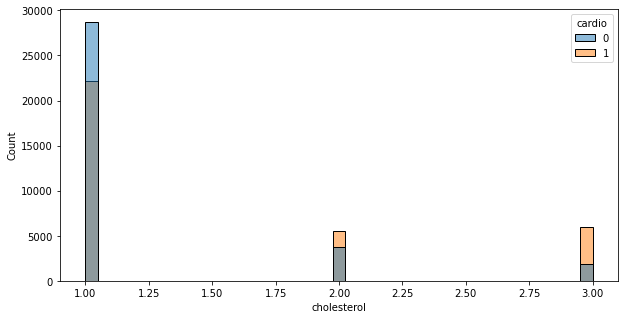

In [55]:
# Seeing the prevalence of cardiovascular disease by cholesterol level.
plt.figure(figsize=(10,5))
sns.histplot(x='cholesterol', hue='cardio', data=cvd)
plt.show()

Among those with a cholesterol rating of 3 (i.e., cholesterol level is well-above average), we see a high prevalence of cardiovascular disease.

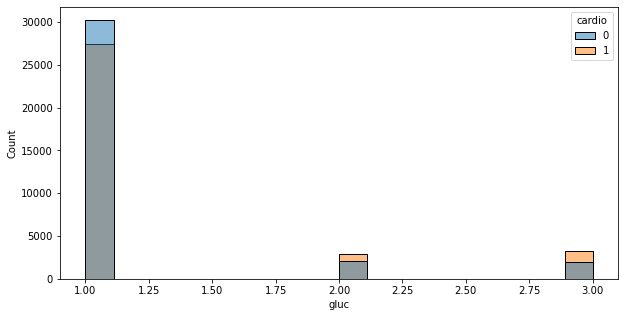

In [56]:
# Seeing the prevalence of cardiovascular disease by blood sugar level. 
plt.figure(figsize=(10,5))
sns.histplot(x='gluc', hue='cardio', data=cvd)
plt.show()

Among those with a glucose rating of 3 (i.e., glucose level is well-above average), we see a high prevalence of cardiovascular disease.

After visualizing the variables and seeing their respective relations, it is time to begin the next step.

# 3 Preprocessing

## 3.1 Checking for Categorical Variables

In [57]:
# Checking for categorical features to render them as indicator features.
cvd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67851 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           67851 non-null  int64  
 1   age (yr)     67851 non-null  float64
 2   gender       67851 non-null  int64  
 3   height (in)  67851 non-null  float64
 4   weight (lb)  67851 non-null  float64
 5   ap_hi        67851 non-null  int64  
 6   ap_lo        67851 non-null  int64  
 7   cholesterol  67851 non-null  int64  
 8   gluc         67851 non-null  int64  
 9   smoke        67851 non-null  int64  
 10  alco         67851 non-null  int64  
 11  active       67851 non-null  int64  
 12  cardio       67851 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 9.3 MB


No categorical variables are to be found. 

Moving on to the next step.

## 3.2 Splitting Data into Training and Test Datasets

In [58]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Getting predictor variables
X = cvd.drop('cardio', axis=1)
y = cvd['cardio'] # Getting reponse variable

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [59]:
X.shape, y.shape

((67851, 12), (67851,))

## 3.3 Scaling Data

In [60]:
# Importing StandardScaler # 
from sklearn.preprocessing import StandardScaler

# Scaling data
scaler = StandardScaler() # Instantiate StandardScaler
scaled_df = scaler.fit_transform(X) # Fit and transform scaler onto data
#scaled_df = pd.DataFrame(scaled_df, columns=cvd.columns)

In [61]:
X.shape, y.shape

((67851, 12), (67851,))

# 4 Modeling

Moving onto the modelling step. There are a few classification models that will be used --namely, k-nearest neighbors (KNN), logistic regression, decision tree, and random forest. Let's begin with the first. 

## 4.1 Model: K-Nearest Neighbors with GridSearch

In [62]:
# Importing essential modules.
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn                 import preprocessing
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix
from pprint                  import pprint

In [63]:
# Default KNN model before hyperparameter tuning.
KNN_model_default = KNeighborsClassifier()
KNN_model_default.fit(X_train, y_train)
y_pred_KNN_default = KNN_model_default.predict(X_test)

# Checking performance of default KNN model.
print(accuracy_score(y_test, y_pred_KNN_default))
print(classification_report(y_test, y_pred_KNN_default))
print(confusion_matrix(y_test, y_pred_KNN_default))

# Look at parameters used in default KNN model
print('Parameters currently in use:\n')
pprint(KNN_model_default.get_params())

0.6206523875024563
              precision    recall  f1-score   support

           0       0.61      0.67      0.64     10250
           1       0.63      0.57      0.60     10106

    accuracy                           0.62     20356
   macro avg       0.62      0.62      0.62     20356
weighted avg       0.62      0.62      0.62     20356

[[6897 3353]
 [4369 5737]]
Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


The default KNN model performs poorly. It is only slightly better performing than the flipping of a coin (i.e., slightly better than chance). Let's do some hyperparameter tuning to improve the model's performance.

In [64]:
# Instantiating non-default KNN model.
knn = KNeighborsClassifier()

# Setting range of parameters for GridSearchCV.
params = {
    'n_neighbors': (3, 5, 8, 10),
    'leaf_size'  : (20, 40, 1),
    'p'          : (1, 2),
    'weights'    : ('uniform', 'distance'),
    'metric'     : ('minkowski', 'chebyshev')
}
                   
# Setting up GridSearchCV.
grid_search_KNN = GridSearchCV(
    estimator=knn, 
    param_grid=params, 
    scoring='accuracy', 
    n_jobs=-1,
    cv=5
)

In [65]:
# Fitting and predicting
KNN = grid_search_KNN.fit(X_train, y_train)
y_pred_KNN = grid_search_KNN.predict(X_test)

# Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_)

# Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_)

{'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Score - KNN: 0.6363827771344353


In [66]:
# Instantiating and running highest-performing KNN model.
KNN = KNeighborsClassifier(n_neighbors=10, leaf_size=1, metric='minkowski',
                            p=1, weights='distance')
KNN.fit(X_train, y_train)
y_pred_KNN = KNN_model_default.predict(X_test)

# Checking performance of optimized KNN model.
print(accuracy_score(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))
print(confusion_matrix(y_test, y_pred_KNN))

0.6206523875024563
              precision    recall  f1-score   support

           0       0.61      0.67      0.64     10250
           1       0.63      0.57      0.60     10106

    accuracy                           0.62     20356
   macro avg       0.62      0.62      0.62     20356
weighted avg       0.62      0.62      0.62     20356

[[6897 3353]
 [4369 5737]]


Performing a gridsearch did improve the KNN model's performance, but only slightly. It seems this model isn't ideal for the problem at hand. Let's try a logistic regression model. 

## 4.2 Model: Logistic Regression with GridSearch

In [67]:
# Import model
from sklearn.linear_model import LogisticRegression

# Like before, get perfomance accuracy of default model before hyperparameter tuning.
logreg_default = LogisticRegression(random_state=0)
logreg_default.fit(X_train, y_train)
y_pred_logreg_default = logreg_default.predict(X_test)

# Checking performance of default logistic regression model.
print(accuracy_score(y_test, y_pred_logreg_default))
print(classification_report(y_test, y_pred_logreg_default))
print(confusion_matrix(y_test, y_pred_logreg_default))

# Look at parameters used in default logistic regression model
print('Parameters currently in use:\n')
pprint(logreg_default.get_params())

0.7056887404205149
              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10250
           1       0.72      0.66      0.69     10106

    accuracy                           0.71     20356
   macro avg       0.71      0.71      0.70     20356
weighted avg       0.71      0.71      0.70     20356

[[7734 2516]
 [3475 6631]]
Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [68]:
# Setting parameter grid.
params = {
    'penalty' : ['l1','l2'], 
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

# Setting up a non-default model.
logreg = LogisticRegression(random_state=1, max_iter=100000)
grid_search_logreg = GridSearchCV(
    estimator=logreg,   # model
    param_grid=params,  # hyperparameters
    scoring='accuracy', # metric for scoring
    cv=5                # number of cross-validations
)
# Fitting data
grid_search_logreg.fit(X_train, y_train)

# Printing best hyperparameters and score.
print('Tuned Hyperparameters: ', grid_search_logreg.best_params_) # Output:
print('Accuracy: ', grid_search_logreg.best_score_)               # Tuned Hyperparameters : {'penalty': 'l2', 'solver': 'newton-cg'}                                               
                                                                  # Accuracy : 0.7249184124644701

C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

Tuned Hyperparameters:  {'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy:  0.7249184124644701


C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [69]:
# Verifying highest-performing logistic regression model
logreg = LogisticRegression(penalty='l2', solver='newton-cg')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Checking performance of optimized logistic regression model.
print(accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

0.7331499312242091
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10250
           1       0.76      0.67      0.71     10106

    accuracy                           0.73     20356
   macro avg       0.74      0.73      0.73     20356
weighted avg       0.74      0.73      0.73     20356

[[8117 2133]
 [3299 6807]]


C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\16466\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


The results of the logistic regression model are certainly better than the results of the KNN model. However, the performance can be possibly improved by trying out a few other classification models. Next up, I'll try a decision tree model. 

## 4.3 Model: Decision Tree with GridSearch

In [70]:
# Importing model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Running default model
decision_tree_default = DecisionTreeClassifier(random_state=0) # Instantiate
decision_tree_default = decision_tree_default.fit(X_train, y_train) # Fit model
y_pred_decision_tree_default = decision_tree_default.predict(X_test) # Predict

# Checking performance of default decision tree model.
print(accuracy_score(y_test, y_pred_decision_tree_default))
print(classification_report(y_test, y_pred_decision_tree_default))
print(confusion_matrix(y_test, y_pred_decision_tree_default))

# Look at parameters used in default decision tree model
print('Parameters currently in use:\n')
pprint(decision_tree_default.get_params())

0.6347514246413833
              precision    recall  f1-score   support

           0       0.64      0.63      0.64     10250
           1       0.63      0.64      0.63     10106

    accuracy                           0.63     20356
   macro avg       0.63      0.63      0.63     20356
weighted avg       0.63      0.63      0.63     20356

[[6481 3769]
 [3666 6440]]
Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}


The performance of the default model is poor. Let's do hyperparameter optimization using GridSearchCV.

In [71]:
# Setting parameter grid
params = {
    'max_depth'        : [5, 7, 10, None],
    'max_leaf_nodes'   : list(range(2, 100)),
    'min_samples_split': [2, 3, 4]
}

# Setting up GridSearchCV.
decision_tree = DecisionTreeClassifier(random_state=1)
grid_search_decision_tree = GridSearchCV(
    estimator=decision_tree, 
    param_grid=params, 
    scoring='accuracy',
    cv=5
)

# Fitting data
grid_search_decision_tree.fit(X_train, y_train)

# Printing best hyperparameters and accuracy.
print('Tuned Hyperparameters: ', grid_search_decision_tree.best_params_)
print('Accuracy: ', grid_search_decision_tree.best_score_)        

Tuned Hyperparameters:  {'max_depth': 5, 'max_leaf_nodes': 17, 'min_samples_split': 2}
Accuracy:  0.7271502263396147


In [72]:
# Verifying highest-performing decision tree model
decision_tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=17, min_samples_split=2)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Checking performance of optimized decision tree model.
print(accuracy_score(y_test, y_pred_decision_tree))
print(classification_report(y_test, y_pred_decision_tree))
print(confusion_matrix(y_test, y_pred_decision_tree))

0.7325604244448811
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10250
           1       0.76      0.67      0.71     10106

    accuracy                           0.73     20356
   macro avg       0.74      0.73      0.73     20356
weighted avg       0.74      0.73      0.73     20356

[[8138 2112]
 [3332 6774]]


The performance of the model has certainly improved. At 73% accuracy, the decision tree model is performing as well as the logistic regression model from earlier. I'll deploy one last model: random forest.

## 4.4 Model: Random Forest with RandomSearch

In [73]:
# Importing model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Setting default random forest model
rfc_default = RandomForestClassifier() # Instantiate
rfc_default.fit(X_train, y_train) # Fit model
y_pred_rfc_default = rfc_default.predict(X_test) # Predict

# Checking performance of default random forest model.
print(accuracy_score(y_test, y_pred_rfc_default))
print(classification_report(y_test, y_pred_rfc_default))
print(confusion_matrix(y_test, y_pred_rfc_default))

# Look at parameters used in default random forest model
print('Parameters currently in use:\n')
pprint(rfc_default.get_params())

0.7209176655531538
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10250
           1       0.73      0.70      0.71     10106

    accuracy                           0.72     20356
   macro avg       0.72      0.72      0.72     20356
weighted avg       0.72      0.72      0.72     20356

[[7648 2602]
 [3079 7027]]
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [74]:
# Setting parameter grid
params = {
    'bootstrap'        : [True],
    'criterion'        : ['gini', 'entropy', 'log_loss'],
    'max_depth'        : [3, 5, None],
    'max_features'     : [2, 3, 4],
    'n_estimators'     : [100, 300, 500]
}

# Instantiate non-default model
rfc = RandomForestClassifier()

# Set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
random_search_rfc = RandomizedSearchCV(rfc, params, n_iter=100, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = random_search_rfc.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

print('Accuracy: ', model.best_score_)

C:\Users\16466\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\16466\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\16466\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\16466\anaconda3\lib\site-packages\sklearn\ensemble

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Accuracy:  0.7263711969681019


In [75]:
# Verifying highest-performing random forest model
rfc = RandomForestClassifier(max_depth=5, max_leaf_nodes=17, min_samples_split=2)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Checking performance of optimized random forest model.
print(accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

0.7300550206327373
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10250
           1       0.75      0.68      0.71     10106

    accuracy                           0.73     20356
   macro avg       0.73      0.73      0.73     20356
weighted avg       0.73      0.73      0.73     20356

[[8024 2226]
 [3269 6837]]


It appears that the logistic regression model generalized the best. 